# CIFAR-10-Mini Project

The goal of this project is to train a network on a subset of the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html). The original dataset contains 50,000 training examples and 10,000 test cases. Here We try to select no more than 1000 training examples and try to reach the best result on the test cases.

First, prepare the script that will present the results.

In [1]:
from utils import parse_config_file, load_history, summarize_diagnostics
path_config, _, _, _ = parse_config_file('saves/configs.json')

def show_history(file_name):
    history = load_history(path_config.training_histories_folder_name + '/' + file_name)
    summarize_diagnostics(history)
    print(f'Best train accuracy: {max(history["accuracy"]):.5f}')
    print(f'Last train accuracy: {history["accuracy"][-1]:.5f}\n')
    print(f'Best test accuracy: {max(history["val_accuracy"]):.5f}')
    print(f'Last test accuracy: {history["val_accuracy"][-1]:.5f}')

## Selecting a Subset Dataset

Our strategy of selecting the best trainging examples is this: first, we teach a network to learn the classification problem using the entire database. A simple and fast network with 70-80% accuracy will be sufficient. We can assume that such a network learned to represent the training images on its last layer; i.e., a feature vector representation that encodes a given image. Second, using these feature vectors we can define a distance matrix, and select training images whose feature vectors are the farthest of each other.

Our selected network is a simplified, 8 layered VGG model with dropout. We used data augmentation on the training images, and trained with SGD with the following parameters: learning rate 0.001, momentum 0.9, batch size 64. After 50 epochs, the loss and accuracy looks like this:

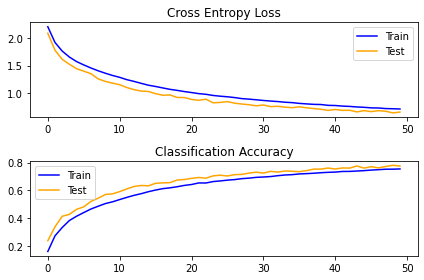

Best train accuracy: 0.75508
Last train accuracy: 0.75508

Best test accuracy: 0.78120
Last test accuracy: 0.77600


In [2]:
show_history('fv_extractor_history.json')

## Selecting a Basic Network

Now we train some basic networks, to decide what network structure we will optimize further. First, we trained an simplified version of VGG with 8 layers (VGG-8), 16 layers (VGG-16), and a ResNet-18. We train them for 50 epochs, with SGD (learning rate: 0.001, momentum 0.9), using batch size 64. Let's see the results, in respective order:

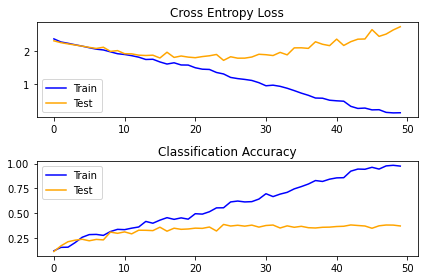

Best train accuracy: 0.98300
Last train accuracy: 0.97500

Best test accuracy: 0.38570
Last test accuracy: 0.37040


In [3]:
show_history('VGG_8_simple_history.json')

VGG-8 is capable of learning, but it stuck early, and started to overfit. Needs regularizations.

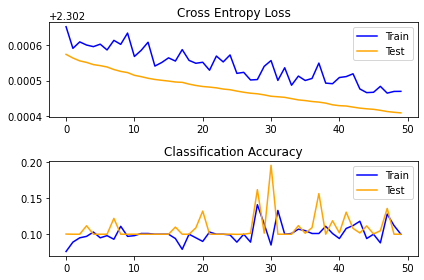

Best train accuracy: 0.14100
Last train accuracy: 0.10000

Best test accuracy: 0.19570
Last test accuracy: 0.10000


In [4]:
show_history('VGG_16_simple_history.json')

VGG-16 is clueless, with these parameters, it didn't learn anything. The network might be too big for such a small training set.

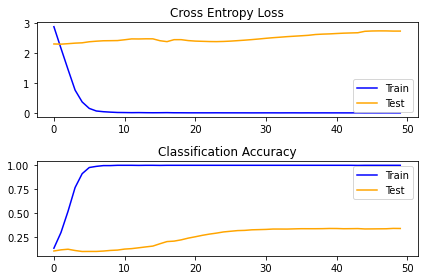

Best train accuracy: 1.00000
Last train accuracy: 1.00000

Best test accuracy: 0.34390
Last test accuracy: 0.34310


In [5]:
show_history('ResNet_18_simple_history.json')

ResNet-18 clearly overfit. It just memorized the training set. This network is too big, or requires massive regularizations.

## Basic Networks + Data Augmentation

Next, let's see how the results changes if we introduce augmentation on the training images. The following augmentations were selected: rotation angle range: [-10°, +10°], zoom range: [0.99, 1.01], width shift range: [-10%, +10%], height shift range: [-10%, +10%], horizontal flip.

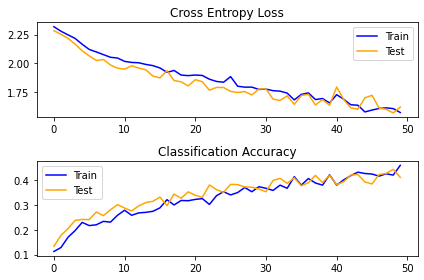

Best train accuracy: 0.46047
Last train accuracy: 0.46047

Best test accuracy: 0.44420
Last test accuracy: 0.41180


In [6]:
show_history('VGG_8_simple_augment_history.json')

VGG-8 is learning! And it seems it can go even further.

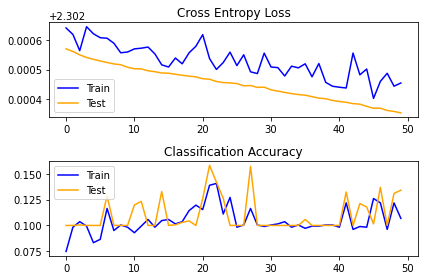

Best train accuracy: 0.14062
Last train accuracy: 0.10684

Best test accuracy: 0.15820
Last test accuracy: 0.13410


In [7]:
show_history('VGG_16_simple_augment_history.json')

VGG-16 is clueless. It might learn with more epochs, but VGG-8 is more promising.

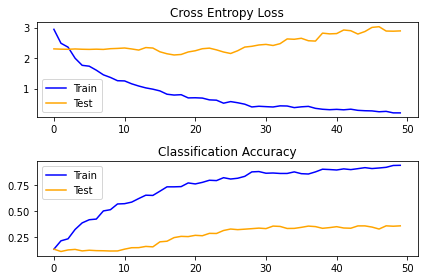

Best train accuracy: 0.93910
Last train accuracy: 0.93910

Best test accuracy: 0.35940
Last test accuracy: 0.35920


In [8]:
show_history('ResNet_18_simple_augment_history.json')

Augmentation helped ResNet-18, but it still stuck and massively overfit.

## VGG-8 as Selected Network - Further Tweaks

### SGD or Adam

It seems that VGG-8 is a promising network. Let's see if we get better results! From here, we always use data augmentation. The epochs are increased to 200, and set up early stopping: if the test accuracy does not imporve through 20 epochs.

First, let's see if SGD or Adam would be a better optimizer. (SGD with 0.001 learning rate and 0.9 momentum, Adam with 0.001 learning rate.)

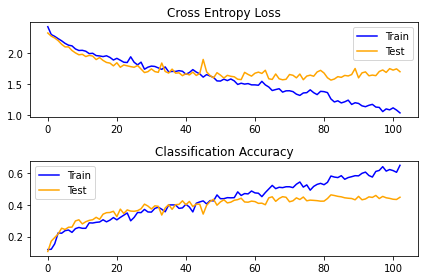

Best train accuracy: 0.64744
Last train accuracy: 0.64744

Best test accuracy: 0.46200
Last test accuracy: 0.44700


In [9]:
show_history('VGG_8_advanced_lr0.001_sgd_history.json')

SGD provides a decent job, but around 50 epochs it starts to overfit, and stopped improving the test accuracy after 100 epochs.

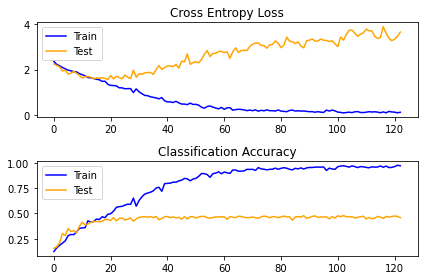

Best train accuracy: 0.97436
Last train accuracy: 0.97009

Best test accuracy: 0.47790
Last test accuracy: 0.45830


In [10]:
show_history('VGG_8_advanced_lr0.001_adam_history.json')

Adam reached a similar accuracy much faster, and started to overfit early. From now on, we chose Adam as our optimizer.

### Dropout and Weight Decay

Now let's modify the network by introducing dropout and weight decay. We introduce a 20% dropout after each MaxPool layer and between the two fully connected layers. With weight decay, we use L2 kernel regularizer with 0.001 penalty. The following results are in order: dropout, weight decay, dropout + weight decay.

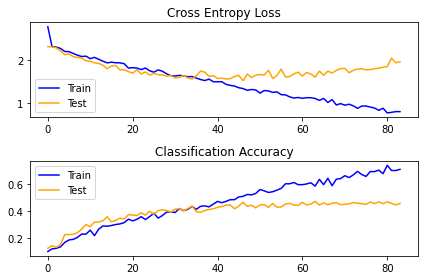

Best train accuracy: 0.73611
Last train accuracy: 0.70620

Best test accuracy: 0.46920
Last test accuracy: 0.45380


In [11]:
show_history('VGG_8_advanced_lr0.001_adam_do_history.json')

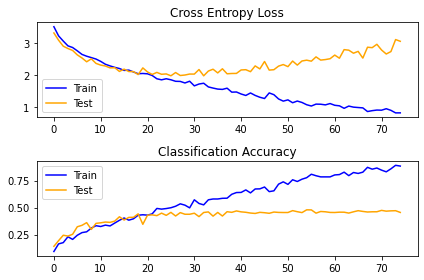

Best train accuracy: 0.89271
Last train accuracy: 0.88568

Best test accuracy: 0.47950
Last test accuracy: 0.45550


In [12]:
show_history('VGG_8_advanced_lr0.001_adam_wd_history.json')

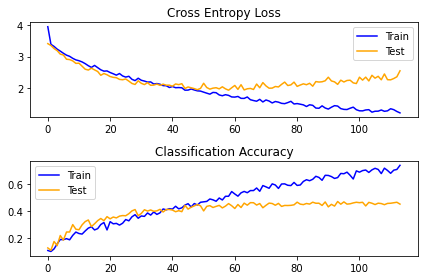

Best train accuracy: 0.74359
Last train accuracy: 0.74359

Best test accuracy: 0.47250
Last test accuracy: 0.45300


In [13]:
show_history('VGG_8_advanced_lr0.001_adam_do_wd_history.json')

Weight decay helped a bit, dropout not much. Maybe the percentage was too small.

Let's do some more testing: dropout + weight decay, but this time with batch size 32.

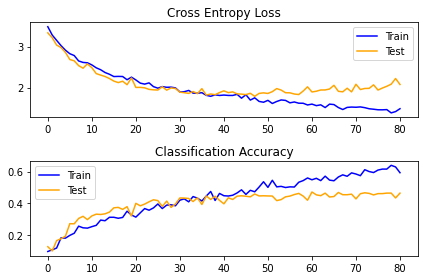

Best train accuracy: 0.63946
Last train accuracy: 0.59298

Best test accuracy: 0.47180
Last test accuracy: 0.46480


In [14]:
show_history('VGG_8_advanced_lr0.001_adam_do_wd_batch32_history.json')

Maybe if we decrease the learning rate, the model achieve better accuracy over a bigger time span:

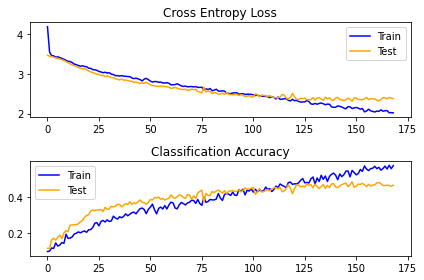

Best train accuracy: 0.57292
Last train accuracy: 0.57158

Best test accuracy: 0.48170
Last test accuracy: 0.46390


In [15]:
show_history('VGG_8_advanced_lr0.0001_adam_do_wd_history.json')

It did, although not much.

It seemed that in order to achieve better accuracy, we need further testings...


# Example Results

Let's load a trained network and see a few example predictions.

In [16]:
from utils import load_and_make_predictions, show_example_result

In [17]:
model_type = 'VGG_8_with_dropout_and_weight_decay'
model_weights = 'saves/model_weights/VGG_8_advanced_lr0.0001_adam_do_wd'

In [18]:
test_images, test_labels, predictions = load_and_make_predictions(model_type, model_weights)

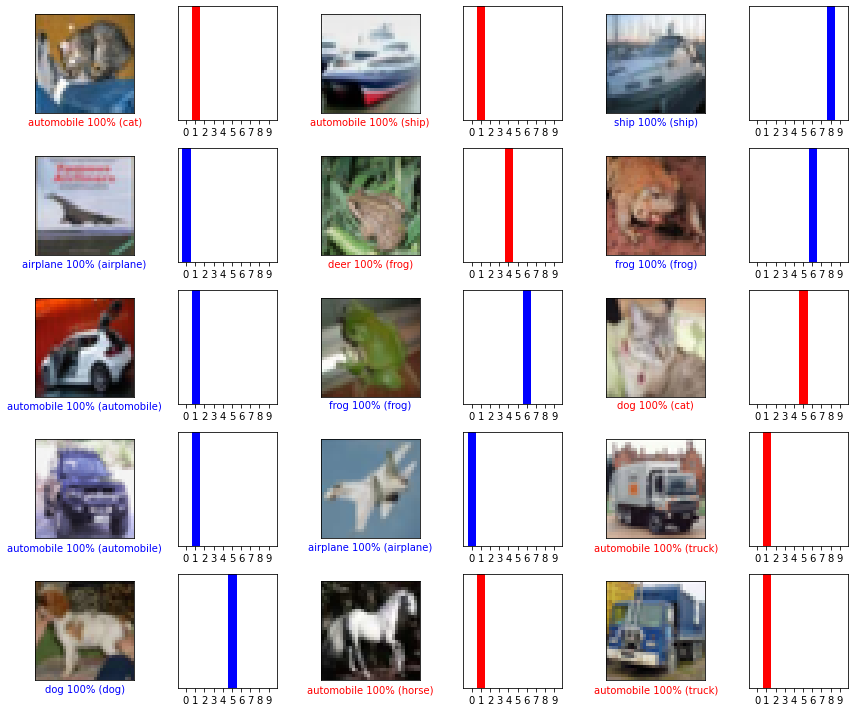

In [19]:
show_example_result(test_images, test_labels, predictions)

Conclusion: some mistakes are understandable, like mistakenly identifying a cat as dog, or a truck as an automobile. Some mistakes are more serious...

But again, the network only saw 100 images per classes - maybe that is not bad after all.